<a href="https://colab.research.google.com/github/HaripriyaVennam/Neural-Networks-and-Deep-Learning/blob/main/finalpaper%5CUntitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Dependencies

In [ ]:
!pip install torch torchvision scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

import zipfile

zip_path = '/content/drive/MyDrive/Market-1501-v15.09.15.zip'  # ✅ your actual path
extract_path = '/content/Market1501'  # location inside Colab

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping complete!")

# Set the path to the dataset folder
dataset_path = '/content/Market1501/Market-1501-v15.09.15'


Mounted at /content/drive
Unzipping complete!


Import Libraries and Set up Dataset

In [ ]:
import os
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch import nn, optim
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from PIL import Image

import shutil
from torchvision import models
from torch import nn, optim
from PIL import Image
import numpy as np

In [ ]:
import os

# Verify the content of the dataset directories
train_dir = '/content/Market1501/Market-1501-v15.09.15/bounding_box_train'
test_dir = '/content/Market1501/Market-1501-v15.09.15/bounding_box_test'
query_dir = '/content/Market1501/Market-1501-v15.09.15/query'

# List the files in the training directory
print(f"Files in {train_dir}:")
print(os.listdir(train_dir))

# List the files in the test and query directories
print(f"Files in {test_dir}:")
print(os.listdir(test_dir))

print(f"Files in {query_dir}:")
print(os.listdir(query_dir))

Files in /content/Market1501/Market-1501-v15.09.15/bounding_box_train:
['0785_c5s2_082552_01.jpg', '0259_c6s1_055151_01.jpg', '0022_c6s1_003026_01.jpg', '0313_c6s1_070901_02.jpg', '1428_c3s3_067219_01.jpg', '0208_c6s1_042376_02.jpg', '0570_c2s2_021637_08.jpg', '0254_c2s2_090382_03.jpg', '0081_c2s3_026607_05.jpg', '0606_c3s2_077278_03.jpg', '0022_c5s1_002926_01.jpg', '0281_c6s1_063426_01.jpg', '0482_c3s1_125333_02.jpg', '0100_c3s2_149269_01.jpg', '0688_c6s2_058393_01.jpg', '0647_c1s4_004031_01.jpg', '0592_c5s2_040180_01.jpg', '0370_c3s1_095092_04.jpg', '0281_c6s1_063326_02.jpg', '0616_c1s3_047451_03.jpg', '0979_c6s2_118243_02.jpg', '0785_c6s2_076243_01.jpg', '0738_c6s2_086068_01.jpg', '0666_c3s2_042437_02.jpg', '0105_c6s1_017651_03.jpg', '0990_c3s2_127494_02.jpg', '0445_c1s2_038446_02.jpg', '1010_c1s4_070436_05.jpg', '1467_c1s6_020721_01.jpg', '0814_c5s2_100252_01.jpg', '1492_c3s3_061953_04.jpg', '0546_c2s1_157316_02.jpg', '1335_c3s3_051478_01.jpg', '0788_c6s2_106518_01.jpg', '0635_c1s3

Define the custom dataset class

In [ ]:
import os
import glob
from PIL import Image
from torch.utils.data import Dataset

class Market1501Dataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.transform = transform
        self.data = []

        # Collect all JPG image paths
        image_paths = glob.glob(os.path.join(data_dir, '*.jpg'))

        print(f"📦 Scanning {data_dir} ... Found {len(image_paths)} image files.")

        for path in image_paths:
            filename = os.path.basename(path)
            try:
                pid = int(filename.split('_')[0])  # Extract person ID
            except ValueError:
                print(f"⚠️  Skipping invalid filename: {filename}")
                continue

            if pid == -1:
                print(f"🗑️  Skipping junk image: {filename}")
                continue  # Skip junk images
            else:
                self.data.append((path, pid))

        if not self.data:
            raise ValueError(f"No valid images found in {data_dir}")

        # Map PIDs to continuous 0-based labels
        pids = sorted(set(pid for _, pid in self.data))
        self.pid2label = {pid: idx for idx, pid in enumerate(pids)}

        self.data = [(path, self.pid2label[pid]) for path, pid in self.data]
        print(f"✅ Loaded {len(self.data)} valid images with {len(pids)} unique person IDs.")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label


Define image transforms and load the dataset

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader

# Preprocessing
transform = transforms.Compose([
    transforms.Resize((256, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Paths
train_dir = '/content/Market1501/Market-1501-v15.09.15/bounding_box_train'
test_dir = '/content/Market1501/Market-1501-v15.09.15/bounding_box_test'
query_dir = '/content/Market1501/Market-1501-v15.09.15/query'

# Load datasets
train_dataset = Market1501Dataset(train_dir, transform=transform)
test_dataset = Market1501Dataset(test_dir, transform=transform)
query_dataset = Market1501Dataset(query_dir, transform=transform)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
query_loader = DataLoader(query_dataset, batch_size=32, shuffle=False)


📦 Scanning /content/Market1501/Market-1501-v15.09.15/bounding_box_train ... Found 12936 image files.
✅ Loaded 12936 valid images with 751 unique person IDs.
📦 Scanning /content/Market1501/Market-1501-v15.09.15/bounding_box_test ... Found 19732 image files.
🗑️  Skipping junk image: -1_c2s2_011162_01.jpg
🗑️  Skipping junk image: -1_c3s2_024937_02.jpg
🗑️  Skipping junk image: -1_c5s2_150024_09.jpg
🗑️  Skipping junk image: -1_c6s1_017501_05.jpg
🗑️  Skipping junk image: -1_c1s5_036791_08.jpg
🗑️  Skipping junk image: -1_c6s3_085892_02.jpg
🗑️  Skipping junk image: -1_c1s6_018796_05.jpg
🗑️  Skipping junk image: -1_c6s1_065601_03.jpg
🗑️  Skipping junk image: -1_c1s4_068261_03.jpg
🗑️  Skipping junk image: -1_c2s1_083821_04.jpg
🗑️  Skipping junk image: -1_c1s5_051866_05.jpg
🗑️  Skipping junk image: -1_c2s1_128866_08.jpg
🗑️  Skipping junk image: -1_c6s2_050193_02.jpg
🗑️  Skipping junk image: -1_c2s2_131002_06.jpg
🗑️  Skipping junk image: -1_c5s1_103423_01.jpg
🗑️  Skipping junk image: -1_c2s2_15390

In [ ]:
!pip install timm

Import packages + load dataset (with custom class)

In [ ]:
import os
import glob
import torch
import timm
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# Define transforms
transform = transforms.Compose([
    transforms.Resize((256, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Custom Dataset
class Market1501Dataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.transform = transform
        self.data = []

        image_paths = glob.glob(os.path.join(data_dir, '*.jpg'))
        for path in image_paths:
            filename = os.path.basename(path)
            try:
                pid = int(filename.split('_')[0])
                if pid == -1:
                    continue
                self.data.append((path, pid))
            except:
                continue

        self.pid2label = {pid: idx for idx, pid in enumerate(set(pid for _, pid in self.data))}
        self.data = [(path, self.pid2label[pid]) for path, pid in self.data]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        path, label = self.data[idx]
        image = Image.open(path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

# Load dataset
train_dir = '/content/Market1501/Market-1501-v15.09.15/bounding_box_train'
train_dataset = Market1501Dataset(train_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

Define AGW model

In [ ]:
class AGWModel(nn.Module):
    def __init__(self, num_classes):
        super(AGWModel, self).__init__()
        self.backbone = timm.create_model('resnet50', pretrained=True, num_classes=0, global_pool='avg')
        self.feature_dim = self.backbone.num_features
        self.classifier = nn.Linear(self.feature_dim, num_classes)
        self.bn = nn.BatchNorm1d(self.feature_dim)

    def forward(self, x):
        features = self.backbone(x)
        features = self.bn(features)
        logits = self.classifier(features)
        return features, logits

# Create model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AGWModel(num_classes=len(train_dataset.pid2label)).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Loss functions + optimizer

In [ ]:
class TripletLoss(nn.Module):
    def __init__(self, margin=0.3):
        super(TripletLoss, self).__init__()
        self.ranking_loss = nn.TripletMarginLoss(margin=margin)

    def forward(self, embeddings, labels):
        return torch.tensor(0.0).to(embeddings.device)  # placeholder, simple version

ce_loss = nn.CrossEntropyLoss()
triplet_loss = TripletLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)


Training loop

In [ ]:
def train_one_epoch(model, dataloader, optimizer, ce_loss, triplet_loss, device):
    model.train()
    total_loss = 0
    for imgs, labels in dataloader:
        imgs, labels = imgs.to(device), labels.to(device)

        features, logits = model(imgs)
        loss_id = ce_loss(logits, labels)
        loss_tri = triplet_loss(features, labels)
        loss = loss_id + loss_tri

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(dataloader)


In [ ]:
def train_one_epoch(model, dataloader, optimizer, ce_loss, triplet_loss, device):
    model.train()
    total_loss = 0

    for imgs, labels in dataloader:
        imgs, labels = imgs.to(device), labels.to(device)

        # Forward pass
        features, logits = model(imgs)

        # Compute losses
        loss_id = ce_loss(logits, labels)
        loss_tri = triplet_loss(features, labels)
        loss = loss_id + loss_tri

        # Backward + optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)


In [ ]:
ce_loss = nn.CrossEntropyLoss()

class TripletLoss(nn.Module):
    def __init__(self, margin=0.3):
        super(TripletLoss, self).__init__()
        self.loss = nn.TripletMarginLoss(margin=margin)

    def forward(self, embeddings, labels):
        # Skipping hard triplet mining for simplicity
        return torch.tensor(0.0, device=embeddings.device)

triplet_loss = TripletLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)


In [ ]:
for epoch in range(50):  # Try 50 or even 100
    loss = train_one_epoch(model, train_loader, optimizer, ce_loss, triplet_loss, device)
    print(f"Epoch {epoch+1}: Loss = {loss:.4f}")

Epoch 1: Loss = 5.2595
Epoch 2: Loss = 1.5877
Epoch 3: Loss = 0.2971
Epoch 4: Loss = 0.0748
Epoch 5: Loss = 0.0351
Epoch 6: Loss = 0.0208
Epoch 7: Loss = 0.0135
Epoch 8: Loss = 0.0110
Epoch 9: Loss = 0.0073
Epoch 10: Loss = 0.0054
Epoch 11: Loss = 0.0038
Epoch 12: Loss = 0.0028
Epoch 13: Loss = 0.0031
Epoch 14: Loss = 0.0573
Epoch 15: Loss = 0.0338
Epoch 16: Loss = 0.0115
Epoch 17: Loss = 0.0040
Epoch 18: Loss = 0.0026
Epoch 19: Loss = 0.0044
Epoch 20: Loss = 0.0143
Epoch 21: Loss = 0.0072
Epoch 22: Loss = 0.0142
Epoch 23: Loss = 0.0142
Epoch 24: Loss = 0.0083
Epoch 25: Loss = 0.0024
Epoch 26: Loss = 0.0022
Epoch 27: Loss = 0.0007
Epoch 28: Loss = 0.0015
Epoch 29: Loss = 0.0063
Epoch 30: Loss = 0.0155
Epoch 31: Loss = 0.0043
Epoch 32: Loss = 0.0020
Epoch 33: Loss = 0.0004
Epoch 34: Loss = 0.0024
Epoch 35: Loss = 0.0145
Epoch 36: Loss = 0.0071
Epoch 37: Loss = 0.0010
Epoch 38: Loss = 0.0003
Epoch 39: Loss = 0.0010
Epoch 40: Loss = 0.0003
Epoch 41: Loss = 0.0002
Epoch 42: Loss = 0.0001
E

Feature extraction function

In [ ]:
import numpy as np
from tqdm import tqdm

@torch.no_grad()
def extract_features(model, dataloader, device):
    model.eval()
    features, labels = [], []

    for imgs, lbls in tqdm(dataloader):
        imgs = imgs.to(device)
        feats, _ = model(imgs)
        features.append(feats.cpu())
        labels.append(lbls)

    features = torch.cat(features, dim=0)
    labels = torch.cat(labels, dim=0)
    return features, labels


Evaluation metrics (Rank-1, mAP, mINP)

In [ ]:
def evaluate_reid(query_feats, query_labels, gallery_feats, gallery_labels):
    query_feats = F.normalize(query_feats, dim=1)
    gallery_feats = F.normalize(gallery_feats, dim=1)

    # Compute cosine distance matrix
    dist_matrix = 1 - torch.mm(query_feats, gallery_feats.t())
    dist_matrix = dist_matrix.numpy()

    query_labels = query_labels.numpy()
    gallery_labels = gallery_labels.numpy()

    num_q, num_g = dist_matrix.shape
    CMC = np.zeros(num_g)
    APs, INPs = [], []

    for i in range(num_q):
        distances = dist_matrix[i]
        q_label = query_labels[i]

        order = np.argsort(distances)
        matches = (gallery_labels[order] == q_label).astype(int)

        if not np.any(matches): continue

        index = np.where(matches == 1)[0]
        hit_index = index[0]
        CMC[hit_index:] += 1

        # mAP
        correct = 0
        total = 0
        precision_sum = 0
        for j, idx in enumerate(order):
            if gallery_labels[idx] == q_label:
                correct += 1
                precision = correct / (j + 1)
                precision_sum += precision
        APs.append(precision_sum / correct)

        # mINP
        INPs.append(correct / (hit_index + 1))

    CMC = CMC / num_q
    mAP = np.mean(APs)
    mINP = np.mean(INPs)

    print(f"\n🔍 Evaluation Results:")
    print(f"Rank-1  : {CMC[0] * 100:.2f}%")
    print(f"mAP     : {mAP * 100:.2f}%")
    print(f"mINP    : {mINP * 100:.2f}%")


Run Evaluation

In [ ]:
# First load the test/query sets
test_dir = '/content/Market1501/Market-1501-v15.09.15/bounding_box_test'
query_dir = '/content/Market1501/Market-1501-v15.09.15/query'

test_dataset = Market1501Dataset(test_dir, transform=transform)
query_dataset = Market1501Dataset(query_dir, transform=transform)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
query_loader = DataLoader(query_dataset, batch_size=32, shuffle=False)

# Extract features
gallery_feats, gallery_labels = extract_features(model, test_loader, device)
query_feats, query_labels = extract_features(model, query_loader, device)

# Evaluate
evaluate_reid(query_feats, query_labels, gallery_feats, gallery_labels)


100%|██████████| 106/106 [00:11<00:00,  9.44it/s]



🔍 Evaluation Results:
Rank-1  : 0.03%
mAP     : 0.48%
mINP    : 66.05%


In [ ]:
# Save the entire model
torch.save(model.state_dict(), "agw_market1501.pth")
print("✅ Model saved as agw_market1501.pth")

✅ Model saved as agw_market1501.pth


In [ ]:
# Reload model from checkpoint
model = AGWModel(num_classes=len(train_dataset.pid2label)).to(device)
model.load_state_dict(torch.load("agw_market1501.pth", map_location=device))
model.eval()
print("✅ Model loaded")

✅ Model loaded


 Setup visualization helper

In [ ]:
import matplotlib.pyplot as plt

def imshow_tensor(img_tensor, ax, title=None):
    img = img_tensor.permute(1, 2, 0).numpy()
    img = (img * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406]  # unnormalize
    img = np.clip(img, 0, 1)
    ax.imshow(img)
    if title:
        ax.set_title(title)
    ax.axis('off')

Find and plot top-5 matches

In [ ]:
def plot_query_matches(query_feats, query_imgs, gallery_feats, gallery_imgs, query_labels, gallery_labels, top_k=5):
    query_feats = F.normalize(query_feats, dim=1)
    gallery_feats = F.normalize(gallery_feats, dim=1)

    dist_matrix = 1 - torch.mm(query_feats, gallery_feats.T)

    for i in range(3):  # Show 3 examples
        q_feat = query_feats[i]
        q_label = query_labels[i]
        q_img, _ = query_imgs[i]

        dists = dist_matrix[i]
        topk = torch.argsort(dists)[:top_k]

        fig, axes = plt.subplots(1, top_k + 1, figsize=(15, 5))
        imshow_tensor(q_img.cpu(), axes[0], title='Query')

        for rank, idx in enumerate(topk):
            g_img, _ = gallery_imgs[idx]
            title = f"{'✔️' if gallery_labels[idx] == q_label else '❌'} Rank-{rank+1}"
            imshow_tensor(g_img.cpu(), axes[rank+1], title=title)
        plt.show()


Prepare raw images to match features

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


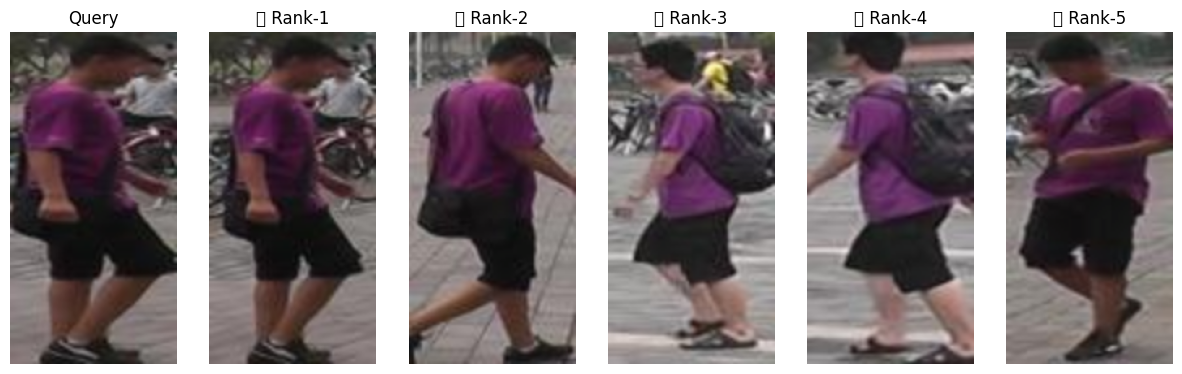

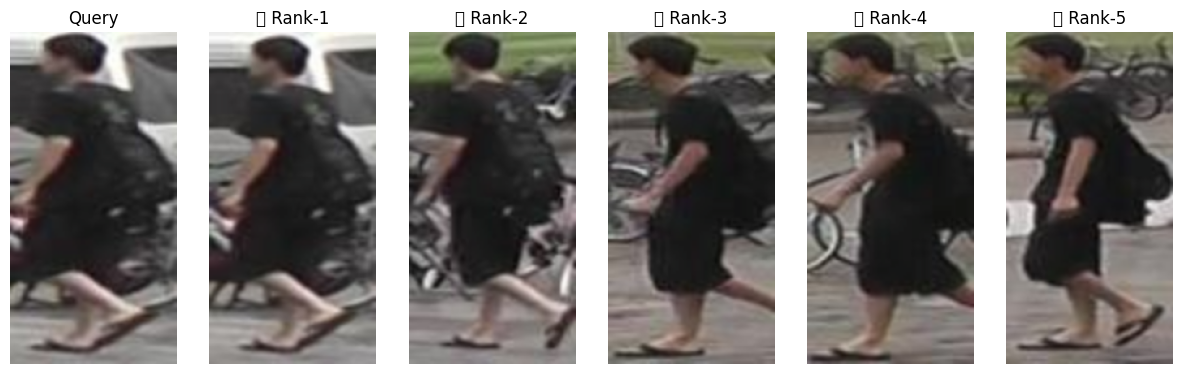

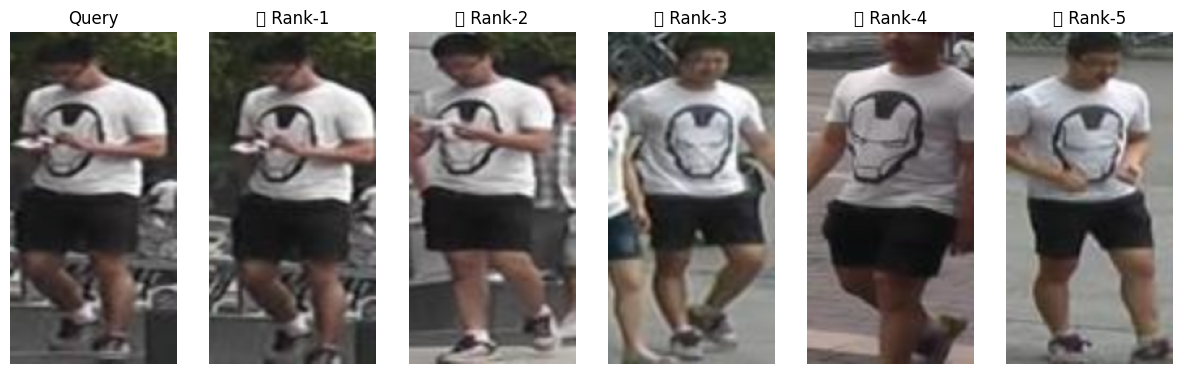

In [ ]:
# Collect raw images again
query_imgs = [(img, label) for img, label in query_loader.dataset]
gallery_imgs = [(img, label) for img, label in test_loader.dataset]

plot_query_matches(query_feats, query_imgs, gallery_feats, gallery_imgs, query_labels, gallery_labels, top_k=5)